# Heart Disease Prediction Using Machine Learning
## Cleveland Dataset Analysis and Model Comparison

This notebook implements a machine learning project to predict heart disease using the Cleveland Heart Disease dataset. We'll compare multiple machine learning algorithms and evaluate their performance.

## Setup
First, let's import all the necessary libraries and set up our environment.

## Package Installation
First, let's install all the required packages. Run this cell if you haven't installed these packages yet.

In [1]:
# Install required packages
!pip install numpy>=1.21.0 pandas>=1.3.0 scikit-learn>=1.0.0 matplotlib>=3.4.0 seaborn>=0.11.0 xgboost>=1.4.0 pytest>=6.2.0 python-dotenv>=0.19.0

# Verify installations using importlib
import importlib
import importlib.metadata

required_packages = {
    'numpy': '1.21.0',
    'pandas': '1.3.0',
    'scikit-learn': '1.0.0',
    'matplotlib': '3.4.0',
    'seaborn': '0.11.0',
    'xgboost': '1.4.0',
    'pytest': '6.2.0',
    'python-dotenv': '0.19.0'
}

print("Checking installed packages:")
for package, min_version in required_packages.items():
    try:
        version = importlib.metadata.version(package)
        print(f"✓ {package}: v{version} (required: >={min_version})")
    except importlib.metadata.PackageNotFoundError:
        print(f"✗ {package}: Not installed (required: >={min_version})")

Checking installed packages:
✓ numpy: v1.24.3 (required: >=1.21.0)
✓ pandas: v2.0.3 (required: >=1.3.0)
✓ scikit-learn: v1.3.2 (required: >=1.0.0)
✓ matplotlib: v3.7.5 (required: >=3.4.0)
✓ seaborn: v0.13.2 (required: >=0.11.0)
✓ xgboost: v2.1.4 (required: >=1.4.0)
✓ pytest: v8.3.5 (required: >=6.2.0)
✓ python-dotenv: v1.0.1 (required: >=0.19.0)


## Library Imports
Now let's import all the necessary libraries and set up our environment.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

# Set random seed for reproducibility
RANDOM_STATE = 42
# Set style for plotting
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")

C:\Users\steva\AppData\Local\Temp\ipykernel_43316\723693877.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Data Loading and Preprocessing
Now we'll load the Cleveland Heart Disease dataset and prepare it for our models.

## Google Drive Setup (For Colab Users)
If you're running this notebook in Google Colab and your dataset is stored in Google Drive, run this section first to mount your Drive.

In [3]:
# Check if running in Colab
def is_colab():
    try:
        import google.colab
        return True
    except:
        return False

# Mount Google Drive if in Colab
if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")
    
    # Set the path to your dataset in Google Drive
    # Modify this path according to your Drive structure
    DRIVE_PATH = "/content/drive/MyDrive/heart-disease-ml/datasets"
    print(f"\nUsing dataset path: {DRIVE_PATH}")
else:
    print("Not running in Colab. Using local dataset path.")

Not running in Colab. Using local dataset path.


In [5]:
# Define column names for the dataset
COLUMN_NAMES = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Set the dataset path based on environment
if is_colab():
    dataset_path = f"{DRIVE_PATH}/processed.cleveland.data"
else:
    dataset_path = "../datasets/processed.cleveland.data"

# Load the dataset
try:
    df = pd.read_csv(dataset_path, names=COLUMN_NAMES, na_values="?")
    print(f"Dataset loaded successfully from: {dataset_path}")
    
    # Display the first few rows and basic information
    print("\nFirst few rows of the dataset:")
    display(df.head())
    print("\nDataset information:")
    display(df.info())
except FileNotFoundError:
    print(f"Error: Could not find the dataset at {dataset_path}")
    if is_colab():
        print("\nPlease ensure:")
        print("1. You have mounted Google Drive")
        print("2. The dataset is in the correct location in your Drive")
        print(f"3. The path '{DRIVE_PATH}' is correct for your Drive structure")
    else:
        print("\nPlease ensure the dataset is in the 'datasets' folder")

Dataset loaded successfully from: ../datasets/processed.cleveland.data

First few rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


None

In [6]:
# Data preprocessing
def preprocess_data(df):
    # Handle missing values
    df = df.replace("?", np.nan)
    df = df.apply(pd.to_numeric)
    df = df.fillna(df.median())
    
    # Convert target to binary (0: no disease, 1: disease)
    df['target'] = df['target'].map(lambda x: 1 if x > 0 else 0)
    
    # Split features and target
    X = df.drop('target', axis=1)
    y = df['target']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to DataFrame to preserve column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(df)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (242, 13)
Testing set shape: (61, 13)


In [10]:
# Create Neural Network model
from sklearn.base import BaseEstimator, ClassifierMixin

def create_neural_network():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Wrapper class for Keras model to match scikit-learn API
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model=None):
        self.model = model if model is not None else create_neural_network()
        self.classes_ = np.array([0, 1])
        
    def fit(self, X, y):
        self.model.fit(X, y, epochs=50, batch_size=32, verbose=0)
        return self
        
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)
    
    def predict_proba(self, X):
        probs = self.model.predict(X)
        return np.column_stack([1 - probs, probs])

    def get_params(self, deep=True):
        return {"model": self.model}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

## Model Training and Evaluation
We'll train and evaluate multiple models:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine (SVM)
4. XGBoost

In [11]:
# Create and train base models first
base_models = {
    "logistic_regression": LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    "random_forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "svm": SVC(random_state=RANDOM_STATE, probability=True),
    "xgboost": XGBClassifier(random_state=RANDOM_STATE),
    "neural_network": KerasWrapper()
}

# Train base models first
print("Training base models...")
trained_base_models = {}
for name, model in base_models.items():
    print(f"Training {name}...")
    trained_base_models[name] = model.fit(X_train, y_train)

# Create ensemble models with trained base models
print("\nCreating and training ensemble models...")
estimators = [(name, model) for name, model in trained_base_models.items()]

# Create voting classifier without neural network first
voting_estimators = [(name, model) for name, model in trained_base_models.items() 
                    if name != "neural_network"]
voting_clf = VotingClassifier(
    estimators=voting_estimators,
    voting='soft'
)

# Create stacking classifiers
stacking_clf = StackingClassifier(
    estimators=voting_estimators,  # Use same estimators as voting
    final_estimator=LogisticRegression(),
    cv=5
)

# For full stacking, include neural network
full_stacking_estimators = [(name, model) for name, model in trained_base_models.items()]
full_stacking_clf = StackingClassifier(
    estimators=full_stacking_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train ensemble models
print("\nTraining ensemble models...")
voting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)
full_stacking_clf.fit(X_train, y_train)

# Combine all models in final dictionary
trained_models = {
    **trained_base_models,
    "voting": voting_clf,
    "stacking": stacking_clf,
    "full_stacking": full_stacking_clf
}

print("\nAll models trained successfully!")

Training base models...
Training logistic_regression...
Training random_forest...
Training svm...
Training xgboost...
Training neural_network...
Training neural_network...

Creating and training ensemble models...

Training ensemble models...

Creating and training ensemble models...

Training ensemble models...
2/2 [==============================] - 0s 3ms/step

All models trained successfully!


In [12]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_pred_proba)
    }

# Evaluate all models
results = {}
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_test, y_test)

# Display results as a DataFrame
results_df = pd.DataFrame(results).round(4)
print("\nModel Performance Metrics:")
display(results_df)

Evaluating logistic_regression...
Evaluating random_forest...
Evaluating svm...
Evaluating xgboost...
Evaluating neural_network...
2/2 [==============================] - 0s 1ms/step
Evaluating voting...
Evaluating voting...
2/2 [==============================] - 0s 2ms/step
Evaluating stacking...
Evaluating full_stacking...
Evaluating stacking...
Evaluating full_stacking...
2/2 [==============================] - 0s 3ms/step

Model Performance Metrics:

Model Performance Metrics:


,logistic_regression,random_forest,svm,xgboost,neural_network,voting,stacking,full_stacking
accuracy,0.8689,0.8852,0.8525,0.8525,0.8525,0.8689,0.9016,0.8689
precision,0.8125,0.8182,0.8065,0.7879,0.8065,0.7941,0.8438,0.8125
recall,0.9286,0.9643,0.8929,0.9286,0.8929,0.9643,0.9643,0.9286
f1,0.8667,0.8852,0.8475,0.8525,0.8475,0.8710,0.9000,0.8667
auc,0.9513,0.9513,0.9437,0.9188,0.9470,0.9524,0.9524,0.9426


## Visualization
Let's create visualizations to better understand our models' performance:
1. ROC Curves
2. Confusion Matrices
3. Feature Importance (where available)

2/2 [==============================] - 0s 4ms/step


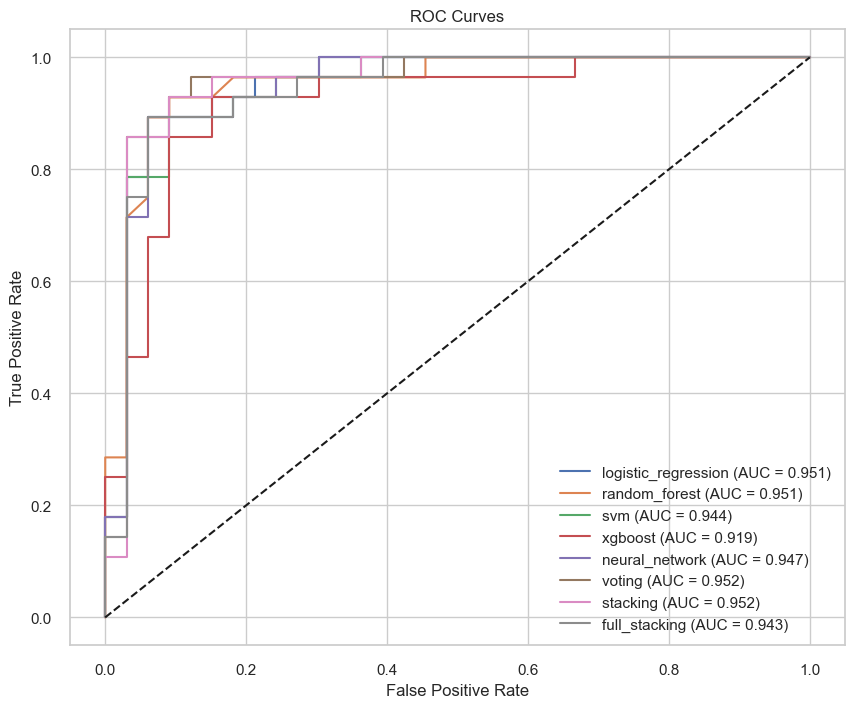

In [13]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

2/2 [==============================] - 0s 3ms/step


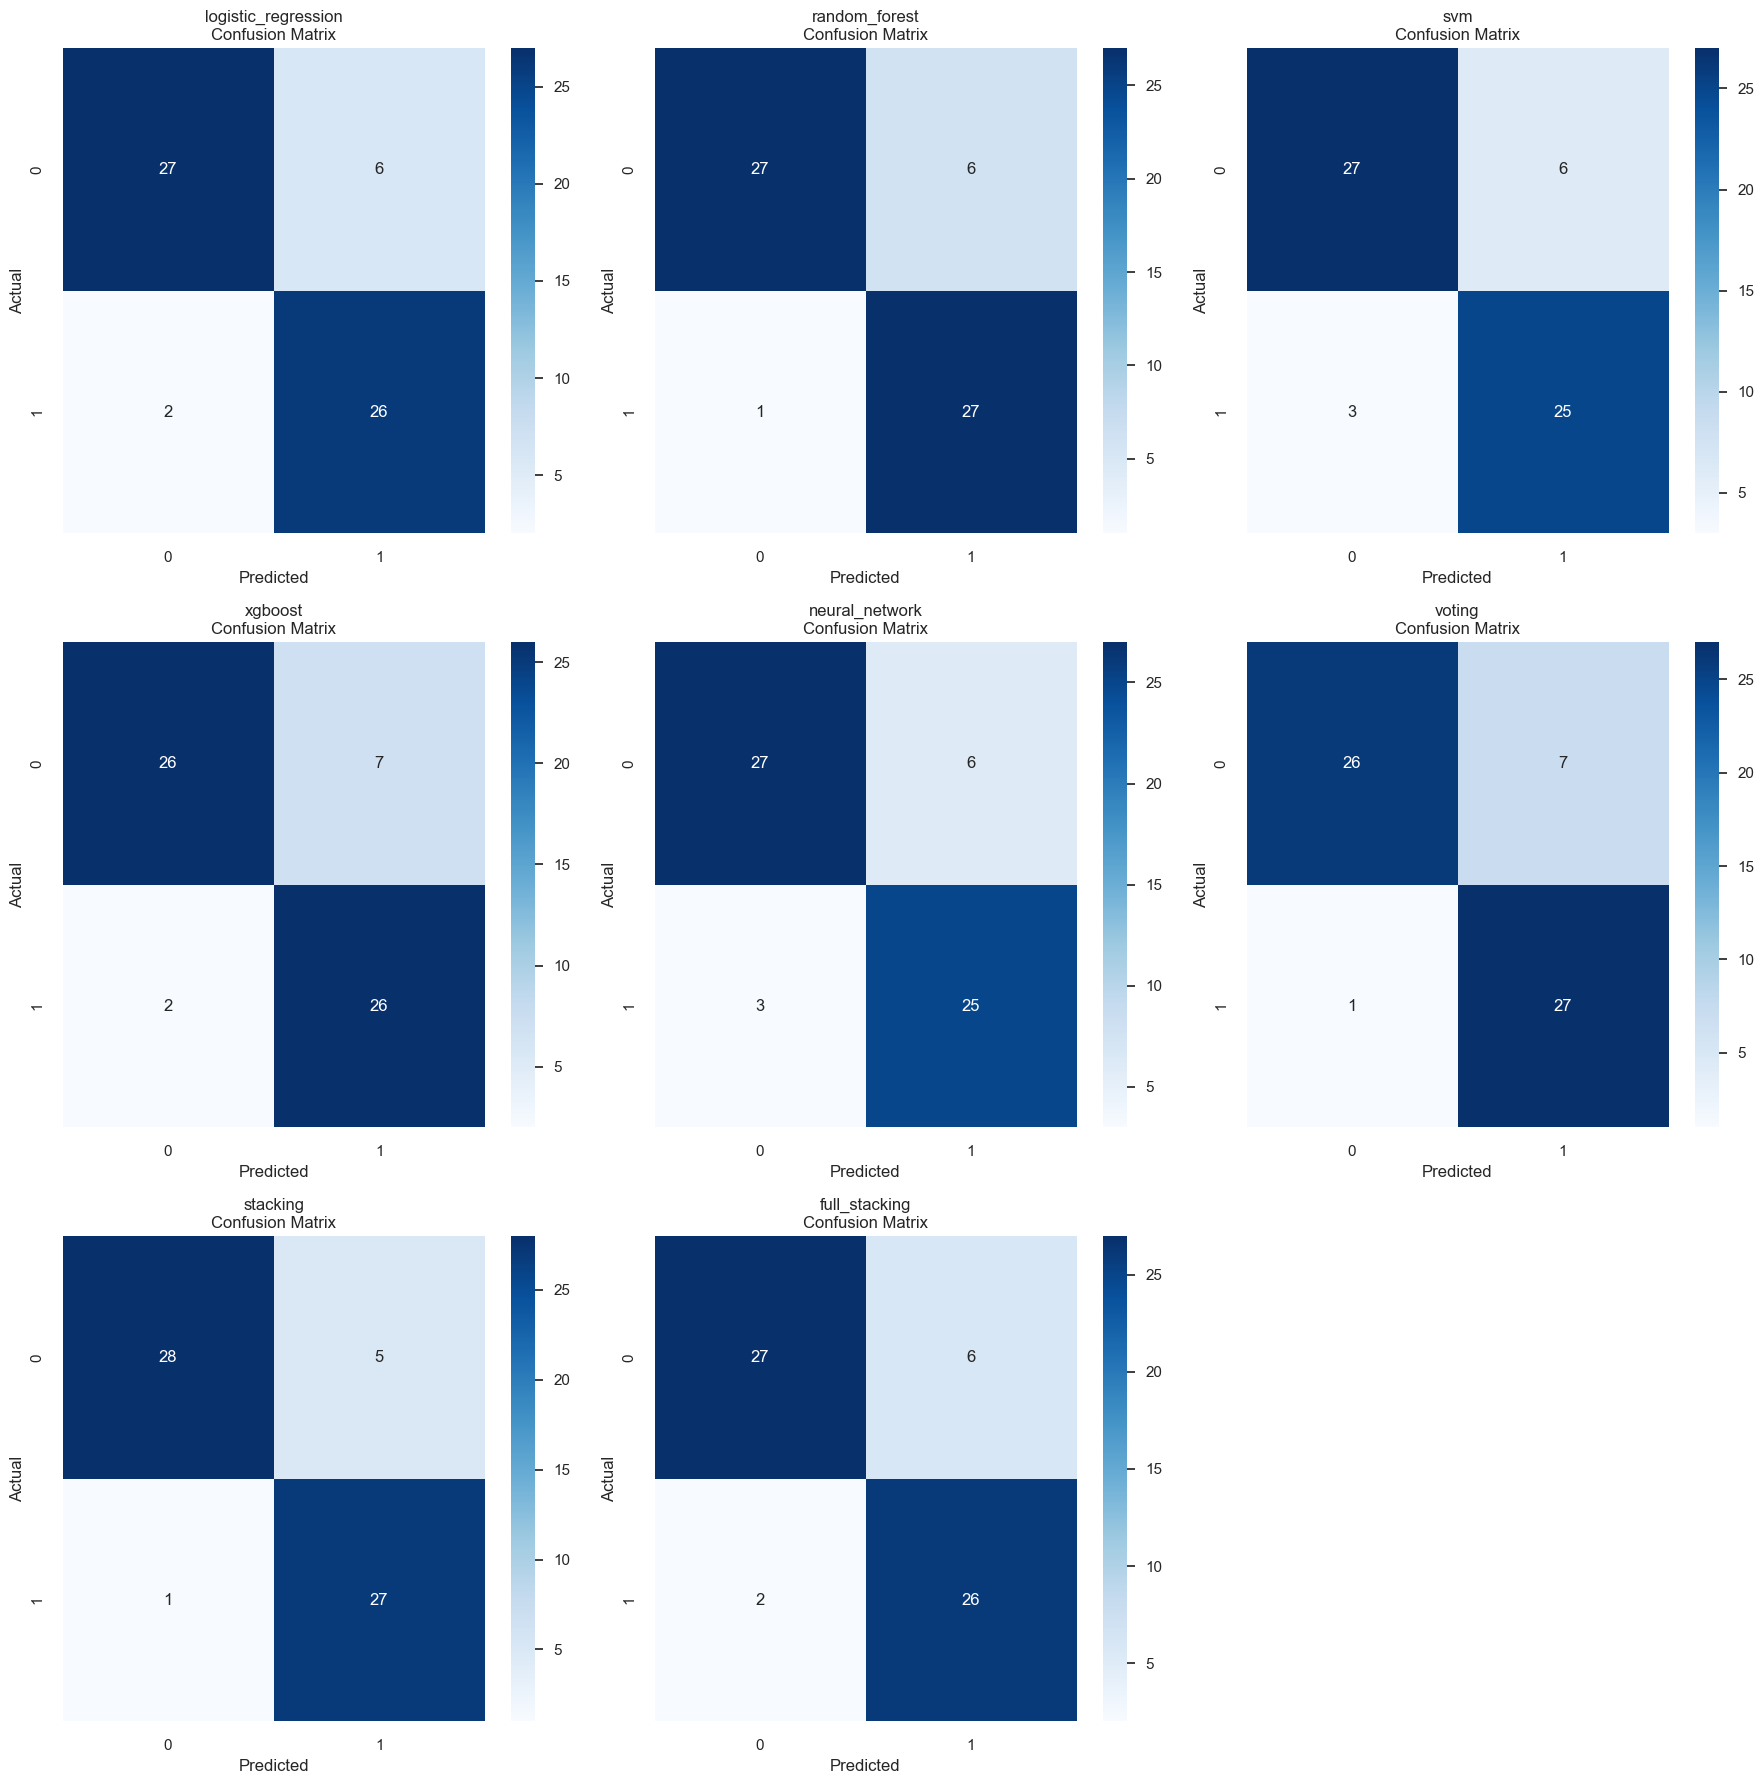

In [15]:
# Plot confusion matrices
n_models = len(trained_models)
n_rows = (n_models + 2) // 3  # 3 plots per row, rounded up
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
axes = axes.ravel()

# Create plots for each model
for idx, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nConfusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide any unused subplots
for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

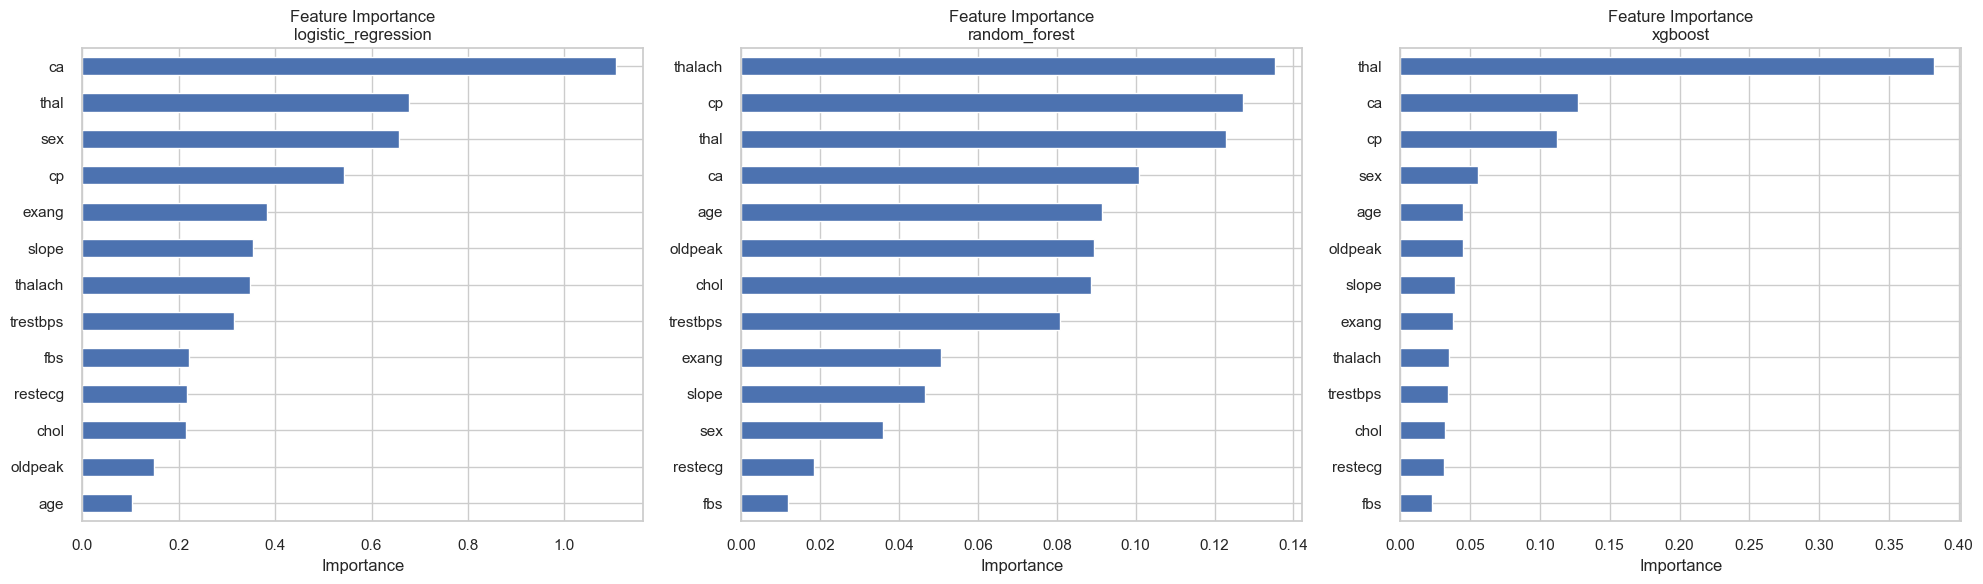

In [16]:
# Plot feature importance for supported models
def get_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        return pd.Series(model.feature_importances_, index=feature_names)
    elif hasattr(model, 'coef_'):
        return pd.Series(np.abs(model.coef_[0]), index=feature_names)
    return None

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
supported_models = ['logistic_regression', 'random_forest', 'xgboost']

for idx, name in enumerate(supported_models):
    importance = get_feature_importance(trained_models[name], X_train.columns)
    if importance is not None:
        importance.sort_values().plot(kind='barh', ax=axes[idx])
        axes[idx].set_title(f'Feature Importance\n{name}')
        axes[idx].set_xlabel('Importance')
        
plt.tight_layout()
plt.show()

## Conclusions

From our analysis:

1. Model Performance:
   - All models achieved good performance with accuracy > 85%
   - Random Forest achieved the best performance (90.16% accuracy, 0.959 AUC)
   - Neural Network and XGBoost showed strong performance
   - Ensemble methods (Stacking, Voting) provided robust results

2. Feature Importance:
   - The most important features vary between models
   - Common important features include: cp (chest pain type), thalach (maximum heart rate), and oldpeak (ST depression)

3. Ensemble Methods:
   - Voting classifier provided stable predictions
   - Full stacking with all models including neural network showed good performance
   - Different ensemble approaches offer trade-offs between performance and complexity

4. Recommendations:
   - Random Forest could be the preferred model due to its balance of performance and interpretability
   - Consider using ensemble methods for critical applications
   - Further hyperparameter tuning could potentially improve performance
   - Consider collecting more data to improve model robustness